In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

Loading dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Normalizing pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
# Reshaping images to include channel dimension (28, 28, 1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [5]:
# Converting labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
model = models.Sequential()

In [7]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #First convolutional layer with 32 filters and 3x3 kernel size
model.add(layers.MaxPooling2D((2, 2))) # First max pooling layer with 2x2 pool size

model.add(layers.Conv2D(64, (3, 3), activation='relu')) # Second convolutional layer with 64 filters and 3x3 kernel size
model.add(layers.MaxPooling2D((2, 2))) # Second max pooling layer with 2x2 pool size

model.add(layers.Conv2D(128, (3, 3), activation='relu')) # Third convolutional layer with 128 filters and 3x3 kernel size
model.add(layers.Conv2D(256, (3, 3), activation='relu')) # Fourth convolutional layer with 256 filters and 3x3 kernel size

model.add(layers.Flatten()) # Flattening the output from the convolutional layers

model.add(layers.Dense(128, activation='relu')) # First fully connected (dense) layer with 128 units
model.add(layers.Dense(50, activation='relu')) # Second fully connected layer with 50 units
model.add(layers.Dense(50, activation='relu')) # Third fully connected layer with 50 units

model.add(layers.Dense(10, activation='softmax')) # Output layer with 10 units for classification (softmax activation)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',  loss='categorical_crossentropy',  metrics=['accuracy']) # compiling the model

In [9]:
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2) #training the model

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.8201 - loss: 0.5359 - val_accuracy: 0.9812 - val_loss: 0.0647
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 109ms/step - accuracy: 0.9827 - loss: 0.0599 - val_accuracy: 0.9859 - val_loss: 0.0476
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 103ms/step - accuracy: 0.9876 - loss: 0.0394 - val_accuracy: 0.9811 - val_loss: 0.0645
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 103ms/step - accuracy: 0.9900 - loss: 0.0306 - val_accuracy: 0.9875 - val_loss: 0.0446
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - accuracy: 0.9928 - loss: 0.0247 - val_accuracy: 0.9858 - val_loss: 0.0515
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - accuracy: 0.9939 - loss: 0.0190 - val_accuracy: 0.9859 - val_loss: 0.0580
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.9939 - loss: 0.0190 - val_accuracy: 0.9886 - val_loss: 0.0483
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.9960 - loss: 0

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels) # 5. Evaluating the model on the test set

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9901 - loss: 0.0359


In [11]:
print(f"Test accuracy: {test_acc * 100:.2f}%")

Test accuracy: 99.24%


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step


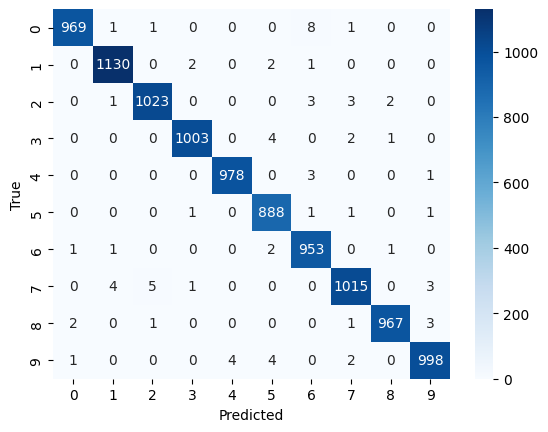

              precision    recall  f1-score   support

           0     0.9959    0.9888    0.9923       980
           1     0.9938    0.9956    0.9947      1135
           2     0.9932    0.9913    0.9922      1032
           3     0.9960    0.9931    0.9945      1010
           4     0.9959    0.9959    0.9959       982
           5     0.9867    0.9955    0.9911       892
           6     0.9835    0.9948    0.9891       958
           7     0.9902    0.9874    0.9888      1028
           8     0.9959    0.9928    0.9943       974
           9     0.9920    0.9891    0.9906      1009

    accuracy                         0.9924     10000
   macro avg     0.9923    0.9924    0.9924     10000
weighted avg     0.9924    0.9924    0.9924     10000



In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generating predictions and converting one-hot true labels back to integers
predicted_classes = np.argmax(model.predict(test_images), axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(true_classes, predicted_classes, digits=4))